In [398]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 8)  # figsize 설정


from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [399]:
df = pd.read_csv("C:\\Users\\shj06\\OneDrive\\바탕 화면\\archive\\pokemon.csv")

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [401]:
# Assuming there is an existing DataFrame 'df', we will drop the specified columns
# The columns to be dropped are: 'base_egg_steps', 'base_happiness', 'experience_growth', 'japanese_name', 
# 'pokedex_number', 'weight_kg', 'height_m'

columns_to_drop = ['base_egg_steps', 'base_happiness', 'experience_growth', 
                   'japanese_name', 'pokedex_number', 'weight_kg', 'height_m','capture_rate','classfication']

# Dropping the specified columns from the DataFrame
df1 = df.drop(columns=columns_to_drop)

# Displaying the resulting DataFrame
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,88.1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,88.1,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,88.1,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,88.1,60,50,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,88.1,80,65,80,fire,NaN,1,0


In [402]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abilities         801 non-null    object 
 1   against_bug       801 non-null    float64
 2   against_dark      801 non-null    float64
 3   against_dragon    801 non-null    float64
 4   against_electric  801 non-null    float64
 5   against_fairy     801 non-null    float64
 6   against_fight     801 non-null    float64
 7   against_fire      801 non-null    float64
 8   against_flying    801 non-null    float64
 9   against_ghost     801 non-null    float64
 10  against_grass     801 non-null    float64
 11  against_ground    801 non-null    float64
 12  against_ice       801 non-null    float64
 13  against_normal    801 non-null    float64
 14  against_poison    801 non-null    float64
 15  against_psychic   801 non-null    float64
 16  against_rock      801 non-null    float64
 1

In [403]:
# 컬럼 명 변경
df1.columns = [
    '능력',
    '상성_벌레',
    '상성_악',
    '상성_드래곤',
    '상성_전기',
    '상성_페어리',
    '상성_격투',
    '상성_불',
    '상성_비행',
    '상성_고스트',
    '상성_풀',
    '상성_땅',
    '상성_얼음',
    '상성_노멀',
    '상성_독',
    '상성_에스퍼',
    '상성_바위',
    '상성_강철',
    '상성_물',
    '공격',
    '스탯_총합',
    '방어',
    '체력',
    '이름',
    '수컷_비율',
    '특수_공격',
    '특수_방어',
    '스피드',
    '타입1',
    '타입2',
    '세대',
    '전설의_포켓몬_여부'
]

In [404]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   능력          801 non-null    object 
 1   상성_벌레       801 non-null    float64
 2   상성_악        801 non-null    float64
 3   상성_드래곤      801 non-null    float64
 4   상성_전기       801 non-null    float64
 5   상성_페어리      801 non-null    float64
 6   상성_격투       801 non-null    float64
 7   상성_불        801 non-null    float64
 8   상성_비행       801 non-null    float64
 9   상성_고스트      801 non-null    float64
 10  상성_풀        801 non-null    float64
 11  상성_땅        801 non-null    float64
 12  상성_얼음       801 non-null    float64
 13  상성_노멀       801 non-null    float64
 14  상성_독        801 non-null    float64
 15  상성_에스퍼      801 non-null    float64
 16  상성_바위       801 non-null    float64
 17  상성_강철       801 non-null    float64
 18  상성_물        801 non-null    float64
 19  공격          801 non-null    i

In [405]:
type_mapping = {
    'bug': '벌레',
    'dark': '악',
    'dragon': '드래곤',
    'electric': '전기',
    'fairy': '페어리',
    'fighting': '격투',
    'fire': '불',
    'flying': '비행',
    'ghost': '고스트',
    'grass': '풀',
    'ground': '땅',
    'ice': '얼음',
    'normal': '노말',
    'poison': '독',
    'psychic': '에스퍼',
    'rock': '바위',
    'steel': '강철',
    'water': '물'
}

df1['타입1'] = df1['타입1'].map(type_mapping)
df1['타입2'] = df1['타입2'].map(type_mapping)


In [406]:
df1['타입1']

0        풀
1        풀
2        풀
3        불
4        불
      ... 
796     강철
797      풀
798      악
799    에스퍼
800     강철
Name: 타입1, Length: 801, dtype: object

In [407]:
df1['타입2'] = df1['타입2'].fillna('없음')

In [408]:
df1['타입2']

0        독
1        독
2        독
3       없음
4       없음
      ... 
796     비행
797     강철
798    드래곤
799     없음
800    페어리
Name: 타입2, Length: 801, dtype: object

In [409]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   능력          801 non-null    object 
 1   상성_벌레       801 non-null    float64
 2   상성_악        801 non-null    float64
 3   상성_드래곤      801 non-null    float64
 4   상성_전기       801 non-null    float64
 5   상성_페어리      801 non-null    float64
 6   상성_격투       801 non-null    float64
 7   상성_불        801 non-null    float64
 8   상성_비행       801 non-null    float64
 9   상성_고스트      801 non-null    float64
 10  상성_풀        801 non-null    float64
 11  상성_땅        801 non-null    float64
 12  상성_얼음       801 non-null    float64
 13  상성_노멀       801 non-null    float64
 14  상성_독        801 non-null    float64
 15  상성_에스퍼      801 non-null    float64
 16  상성_바위       801 non-null    float64
 17  상성_강철       801 non-null    float64
 18  상성_물        801 non-null    float64
 19  공격          801 non-null    i

In [410]:
df1.shape

(801, 32)

In [411]:
# 결측치
df1.isnull().sum()

능력             0
상성_벌레          0
상성_악           0
상성_드래곤         0
상성_전기          0
상성_페어리         0
상성_격투          0
상성_불           0
상성_비행          0
상성_고스트         0
상성_풀           0
상성_땅           0
상성_얼음          0
상성_노멀          0
상성_독           0
상성_에스퍼         0
상성_바위          0
상성_강철          0
상성_물           0
공격             0
스탯_총합          0
방어             0
체력             0
이름             0
수컷_비율         98
특수_공격          0
특수_방어          0
스피드            0
타입1            0
타입2            0
세대             0
전설의_포켓몬_여부     0
dtype: int64

In [412]:
df1.head()

,능력,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_페어리,상성_격투,상성_불,상성_비행,상성_고스트,...,체력,이름,수컷_비율,특수_공격,특수_방어,스피드,타입1,타입2,세대,전설의_포켓몬_여부
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,88.1,65,65,45,풀,독,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,88.1,80,80,60,풀,독,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,88.1,122,120,80,풀,독,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,88.1,60,50,65,불,없음,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,88.1,80,65,80,불,없음,1,0


In [413]:
# Filtering the columns that start with "상성_"
type_effectiveness_cols = [col for col in df1.columns if col.startswith("상성_")]



df1['weakness_score'] = 1+df1[type_effectiveness_cols].sum(axis=1)
# Extracting the 'score' and '이름' (name) columns
score_name_df = df1[["이름", "weakness_score"]]

score_name_df

,이름,weakness_score
0,Bulbasaur,20.25
1,Ivysaur,20.25
2,Venusaur,20.25
3,Charmander,19.00
4,Charmeleon,19.00
...,...,...
796,Celesteela,14.50
797,Kartana,17.25
798,Guzzlord,22.00
799,Necrozma,21.00


In [414]:
df = score_name_df.sort_values(by="weakness_score", ascending=True)

In [415]:
df.head(20)

,이름,weakness_score
800,Magearna,14.25
706,Klefki,14.25
302,Mawile,14.25
796,Celesteela,14.50
226,Skarmory,14.50
680,Aegislash,15.25
679,Doublade,15.25
678,Honedge,15.25
482,Dialga,15.25
394,Empoleon,15.50


In [416]:
df.tail(20)

,이름,weakness_score
102,Exeggutor,25.00
73,Geodude,25.25
245,Larvitar,25.25
463,Rhyperior,25.25
111,Rhydon,25.25
74,Graveler,25.25
75,Golem,25.25
246,Pupitar,25.25
110,Rhyhorn,25.25
94,Onix,25.25


In [417]:
score_name_df

,이름,weakness_score
0,Bulbasaur,20.25
1,Ivysaur,20.25
2,Venusaur,20.25
3,Charmander,19.00
4,Charmeleon,19.00
...,...,...
796,Celesteela,14.50
797,Kartana,17.25
798,Guzzlord,22.00
799,Necrozma,21.00


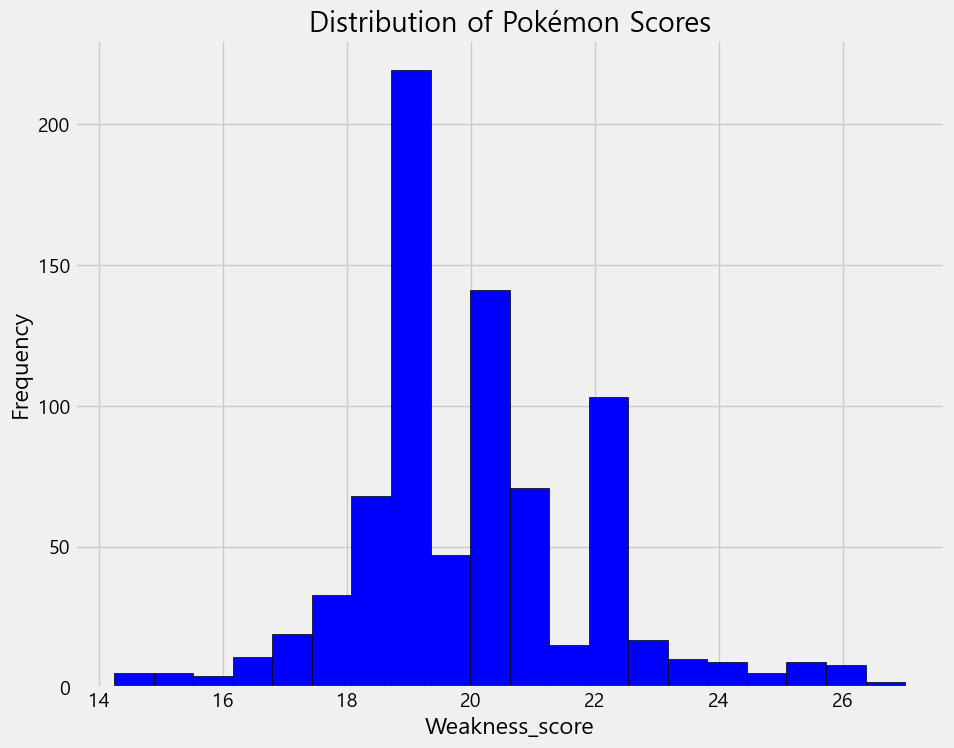

Overall our best score is 14.25  and our worst score is  27.0


In [418]:
import matplotlib.pyplot as plt

# Extracting the 'score' column
x = score_name_df["weakness_score"]

# Plotting the histogram
plt.hist(x, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Pokémon Scores')
plt.xlabel('Weakness_score')
plt.ylabel('Frequency')
plt.show()

# Printing the best and worst score
best_score = min(x)
worst_score = max(x)
print("Overall our best score is", str(best_score), " and our worst score is ", str(worst_score))


In [419]:
#list the pokemon with the highest score
print(score_name_df[score_name_df["weakness_score"] == 13.25]["이름"])

Series([], Name: 이름, dtype: object)


In [420]:
# Extracting Type 1 and Type 2 for Pokémon named 'Amaura' and 'Aurorus' from the original DataFrame
selected_pokemon = df1[df1["이름"].isin(["Mawile", "Klefki","Magearna"])]

# Extracting relevant information
type_info = selected_pokemon[["이름", "타입1", "타입2"]]

type_info

,이름,타입1,타입2
302,Mawile,강철,페어리
706,Klefki,강철,페어리
800,Magearna,강철,페어리


위의 포켓몬은 모두 강철과 요정의 타입 조합을 가지고 있습니다. 강철은 보통, 풀, 얼음, 비행, 초능력, 벌레, 바위, 고스트, 드래곤, 암흑, 강철, 요정에 강하기 때문에 이 조합은 인상적인 조합입니다. 이 유형 조합에 요정을 추가하면 강철의 격투 약점이 무효화되고 벌레, 암흑, 용에 대한 강점이 증가합니다. 이렇게 하면 땅과 화염에 대한 위크니스만 남습니다.

In [421]:
#list the pokemon with the lowest score
print(score_name_df[score_name_df["weakness_score"] == 26]["이름"])

45         Paras
46      Parasect
412     Wormadam
458       Snover
459    Abomasnow
539     Sewaddle
540     Swadloon
541     Leavanny
Name: 이름, dtype: object


In [422]:
# Extracting Type 1 and Type 2 for Pokémon named 'Amaura' and 'Aurorus' from the original DataFrame
selected_pokemon = df1[df1["이름"].isin(["Amaura", "Aurorus"])]

# Extracting relevant information
type_info = selected_pokemon[["이름", "타입1", "타입2"]]

type_info

,이름,타입1,타입2
697,Amaura,바위,얼음
698,Aurorus,바위,얼음


위의 두포켓몬은 바위와 얼음 조합을 가지고있습니다. 바위는 물,풀, 격투, 땅 , 강철에 강하고
노말, 불꽃, 비행 약합니다.또한 얼음이 추가되면 전투,바위,강철에대한 약점이 증가합니다. 또한 불에 두배로 약합니다. 

In [423]:
#cluster analysis 

위의 분석에서 우리는 어떤 포켓몬 유형이 가장 강하고 약한지를 알아냈습니다. 여기서 조금더 나아가 군집분석을 통해 어떤 유형조합이 서로 가장 유사한지 알아봅시다! 
이렇게 하면팀을 구성할때 어떤 포켓몬을 선택하여 할지 더 잘 이해할수있습니다. 

In [424]:
#k-means clustering

In [425]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=8,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df1[type_effectiveness_cols])

KMeans(init='random', n_init=10, random_state=42)

In [426]:
#analyze the output
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
print(kmeans.n_iter_)

# first 5 predicted labels
print(kmeans.labels_[:5])

2660.1809767330606
6
[2 2 2 4 4]


In [427]:
# here we can use the elbow method to find the optimal number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
# Python’s dictionary unpacking operator (**)
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1[type_effectiveness_cols])
    sse.append(kmeans.inertia_)

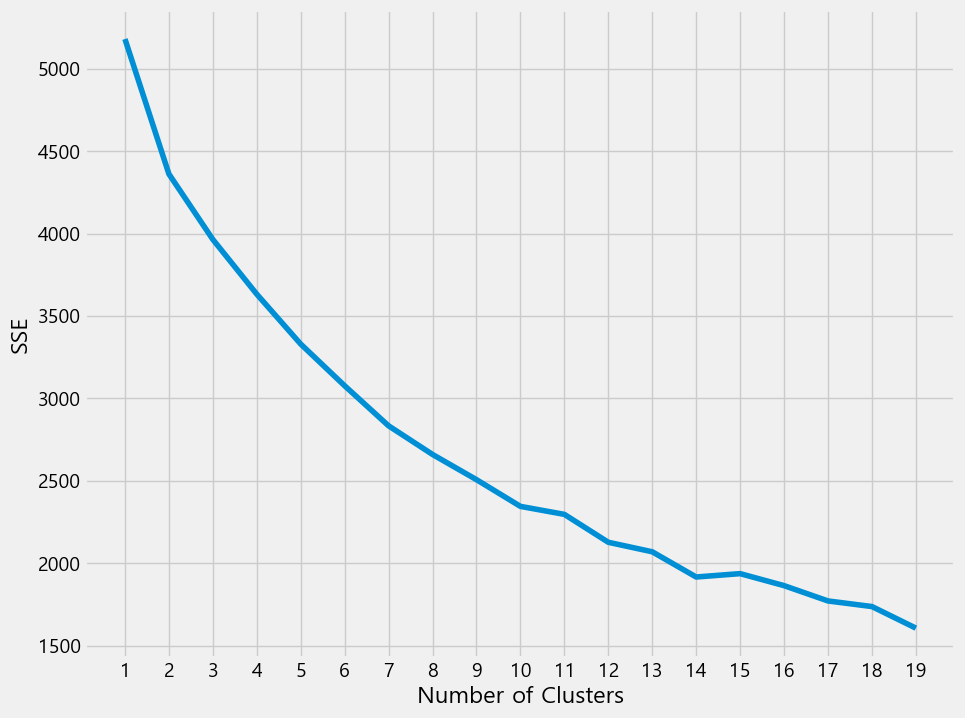

In [428]:
plt.style.use("fivethirtyeight") 
plt.plot(range(1, 20), sse) 
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [429]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
scaled_features = df1[type_effectiveness_cols]

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

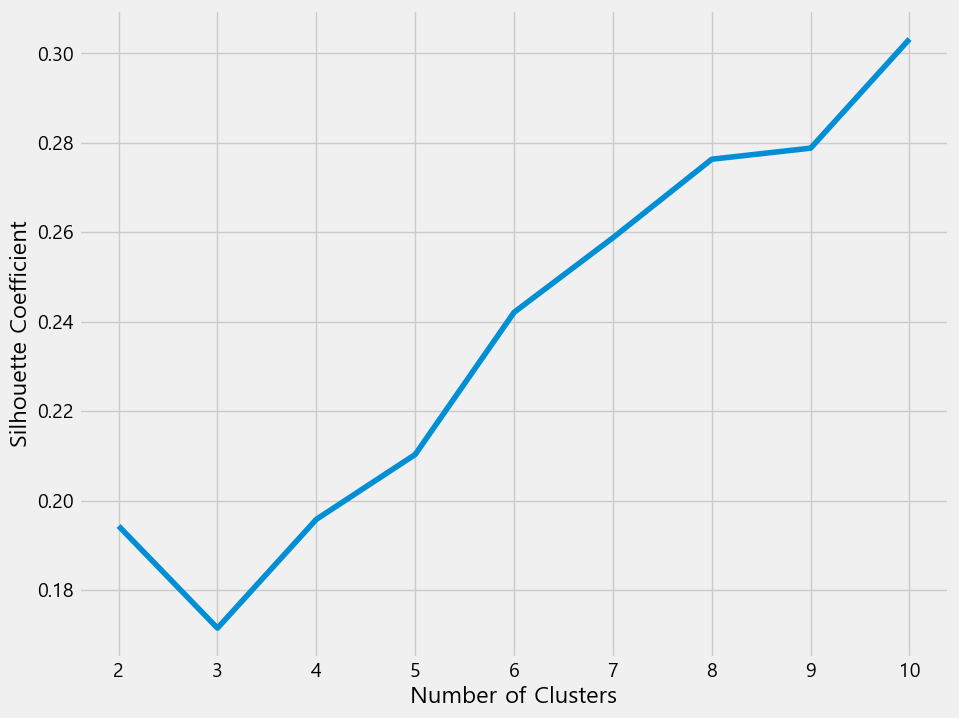

In [430]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [431]:
#hierarchical clustering 

In [432]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [436]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10

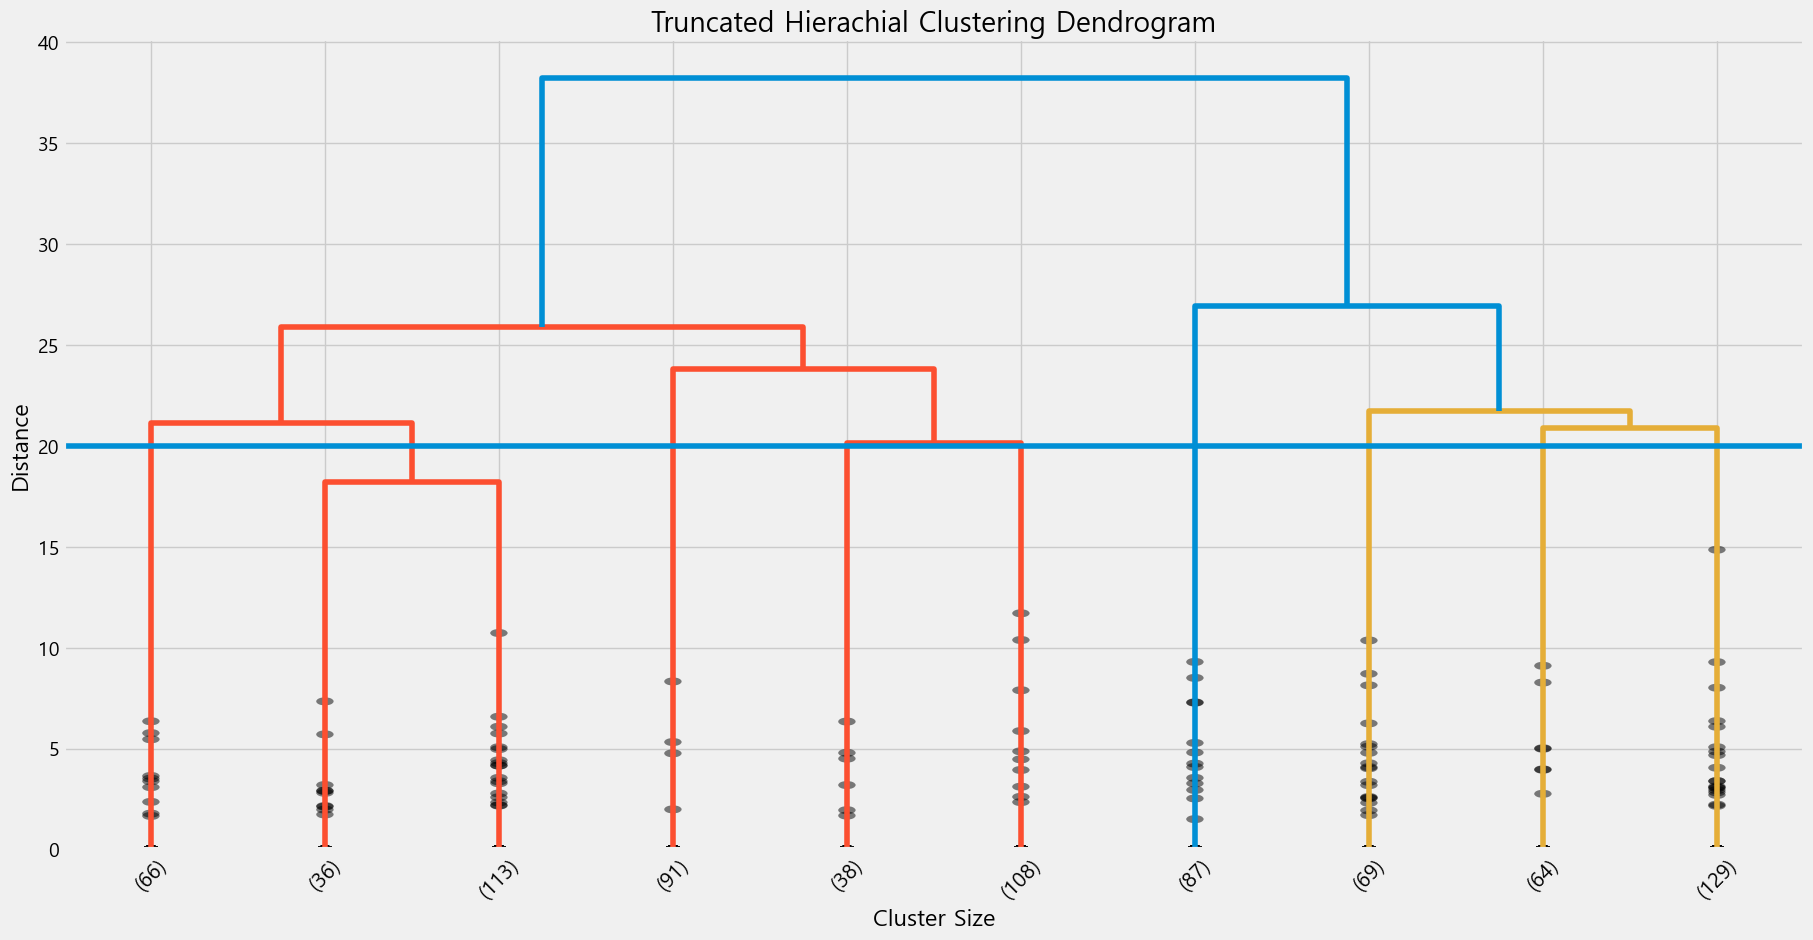

In [437]:
z = linkage(scaled_features,"ward")

#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =10, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=20)
plt.show()

# analyzing clusters 

더 나아가서 저희는 계층적 군집분석 결과와 함께 5개의 클러스터를 선택했습니다. 이렇게 한 이유는 트레이너가 자신의 팀에 7개의 포켓몬을 선택할수 있기때문입니다. 따라서 군집분석을 통해 이질적인 타입 조합을 가진 포켓몬 5마리와 트레이너가 추가로 선택할수 있는 포켓몬ㄴ한마리를 선택할수있습니다ㅣ 

In [438]:
#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [439]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df1[type_effectiveness_cols])

# attach predicted labels to our dataset
df1["clusters"] = kmeans.labels_

#histogram of clusters
fig = px.histogram(df1, x="clusters")
fig.update_layout(
    title_text='Number of Pokemon in Each Cluster', # title of plot
    xaxis_title_text='Cluster', # xaxis label
    yaxis_title_text='Number of Pokemon', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

이제 각 포켓몬을 클러스터에 할당했으니 각 클러스터의 약점과 강점을 찾아보겠습니다.

In [440]:
grid = []
for j in type_effectiveness_cols:
    typ = []
    for i in range(0,5):
        typ.append(df1[df1["clusters"] == i][j].mean())
    grid.append(typ)

In [441]:
grid1 = pd.DataFrame(grid)
grid2 = grid1.transpose()
grid2.columns = type_effectiveness_cols
# grid2["clusters"] = [1,2,3,4,5,6,7,8]
grid2

,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_페어리,상성_격투,상성_불,상성_비행,상성_고스트,상성_풀,상성_땅,상성_얼음,상성_노멀,상성_독,상성_에스퍼,상성_바위,상성_강철,상성_물
0,1.036260,0.884542,1.083969,1.214695,1.374046,1.534351,0.814885,1.087786,0.652672,1.498092,1.068702,0.965649,0.967557,0.961832,0.998092,0.980916,0.933206,0.820611
1,1.507812,1.007812,0.914062,0.636719,0.984375,0.785156,2.226562,2.093750,1.042969,0.453125,0.566406,1.777344,0.921875,1.582031,1.089844,1.269531,1.011719,0.634766
2,0.536036,1.036036,1.027027,1.864865,0.995495,0.585586,1.157658,1.256757,0.815315,0.486486,0.148649,1.806306,0.954955,0.891892,1.063063,2.360360,0.959459,1.054054
3,1.366337,1.900990,0.910891,0.990099,1.009901,0.386139,1.054455,0.975248,2.000000,1.039604,1.202970,0.965347,0.628713,0.779703,0.636139,0.995050,1.004950,1.079208
4,0.683417,0.899497,0.849246,0.771357,0.792714,1.241206,0.884422,0.826633,0.964824,1.099246,1.954774,0.951005,0.851759,0.748744,1.115578,1.103015,1.033920,1.635678


In [442]:
pts = []
for i in range(0,5):
    df = pd.DataFrame(grid2)
    pts.append(df.iloc[i, :])

In [443]:
#CLUSTER1 

In [444]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[0], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 1 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

클러스터1  풀,격투,요정,전기 약하고 고스트,불,물에 강함.  
이 클러스터에 속하는 포켓몬으로는 거북왕, 대짱이 , 게을킹 ,약어리, 그레닌자 가 있습니다.  

In [445]:
selected_pokemon = df1[(df1["clusters"] == 0)]['이름'].head(5)
selected_pokemon  #꼬부기, 어니 부기, 거북왕, 꼬렛,  레트라 

6      Squirtle
7     Wartortle
8     Blastoise
18      Rattata
19     Raticate
Name: 이름, dtype: object

In [472]:
# 클러스터 4에 속한 5개의 포켓몬 선택
cluster_1_pokemon = df1[(df1["clusters"] == 0) & (df1["스탯_총합"] >= 600) & (df1["전설의_포켓몬_여부"] == 0)].head(5)
cluster_1_pokemon

,능력,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_페어리,상성_격투,상성_불,상성_비행,상성_고스트,...,수컷_비율,특수_공격,특수_방어,스피드,타입1,타입2,세대,전설의_포켓몬_여부,weakness_score,clusters
8,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,135,115,78,물,없음,1,0,19.0,0
247,"['Sand Stream', 'Unnerve']",2.0,0.5,1.0,1.0,2.0,4.0,0.5,0.5,0.5,...,50.0,95,120,71,바위,악,2,0,24.0,0
259,"['Torrent', 'Damp']",1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,1.0,...,88.1,95,110,70,물,땅,3,0,19.0,0
288,['Truant'],1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,95,65,100,노말,없음,3,0,19.0,0
444,"['Sand Veil', 'Rough Skin']",1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,...,50.0,120,95,92,드래곤,땅,4,0,21.5,0


In [474]:
# 역할에 따른 능력치 출력
physical_sweeper_stats = cluster_1_pokemon[['이름', '공격', '스피드']]
tanker_stats = cluster_1_pokemon[['이름', '체력', '방어', '특수_방어']]
mixed_sweeper_stats = cluster_1_pokemon[['이름', '공격', '특수_공격', '스피드']]
special_sweeper_stats = cluster_1_pokemon[['이름', '특수_공격', '스피드']]


In [477]:
# 능력치 합계 출력
cluster_1_pokemon['physical_sweeper_score'] = cluster_1_pokemon['공격'] + cluster_1_pokemon['스피드']
cluster_1_pokemon['tanker_score'] = cluster_1_pokemon['체력'] + cluster_1_pokemon['방어'] + cluster_1_pokemon['특수_방어']
cluster_1_pokemon['mixed_sweeper_score'] = cluster_1_pokemon['공격'] + cluster_1_pokemon['특수_공격'] + cluster_1_pokemon['스피드']
cluster_1_pokemon['special_sweeper_score'] = cluster_1_pokemon['특수_공격'] + cluster_1_pokemon['스피드']

In [479]:
# 출력
print("Physical Sweeper Stats1:")
print(physical_sweeper_stats)
print("\nPhysical Sweeper Scores1:")
print(cluster_1_pokemon[['이름', 'physical_sweeper_score']].sort_values(by='physical_sweeper_score', ascending=False).head(5))

print("\nTanker Stats1:")
print(tanker_stats)
print("\nTanker Scores1:")
print(cluster_1_pokemon[['이름', 'tanker_score']].sort_values(by='tanker_score', ascending=False).head(5))

print("\nMixed Sweeper Stats1:")
print(mixed_sweeper_stats)
print("\nMixed Sweeper Scores1:")
print(cluster_1_pokemon[['이름', 'mixed_sweeper_score']].sort_values(by='mixed_sweeper_score', ascending=False).head(5))

print("\nSpecial Sweeper Stats1:")
print(special_sweeper_stats)
print("\nSpecial Sweeper Scores1:")
print(cluster_1_pokemon[['이름', 'special_sweeper_score']].sort_values(by='special_sweeper_score', ascending=False).head(5))

# 역할에 사용한 새로운 열 삭제
# df1.drop(['physical_sweeper_score', 'tanker_score', 'mixed_sweeper_score', 'special_sweeper_score'], axis=1, inplace=True)

Physical Sweeper Stats1:
            이름   공격  스피드
8    Blastoise  103   78
247  Tyranitar  164   71
259   Swampert  150   70
288    Slaking  160  100
444   Garchomp  170   92

Physical Sweeper Scores1:
            이름  physical_sweeper_score
444   Garchomp                     262
288    Slaking                     260
247  Tyranitar                     235
259   Swampert                     220
8    Blastoise                     181

Tanker Stats1:
            이름   체력   방어  특수_방어
8    Blastoise   79  120    115
247  Tyranitar  100  150    120
259   Swampert  100  110    110
288    Slaking  150  100     65
444   Garchomp  108  115     95

Tanker Scores1:
            이름  tanker_score
247  Tyranitar           370
259   Swampert           320
444   Garchomp           318
288    Slaking           315
8    Blastoise           314

Mixed Sweeper Stats1:
            이름   공격  특수_공격  스피드
8    Blastoise  103    135   78
247  Tyranitar  164     95   71
259   Swampert  150     95   70
288    Slaking

In [226]:
#CLUSTER2 

In [227]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[1], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 2 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

이 클러스터2에서는 불,비행,얼음에 약하고, 풀, 땅, 전기에 강합니다.
이 클러스터 속하는 포켓몬으로 핫삼,  이상해꽃, 쁘사이저,나무킹,헤라크로스이 있다.

In [ ]:
> 600으로 설정한이유는 (대회에서 쓸대 스탯 총합이 쎄야 되는데 그 기준이 600정도임 그래서 600으로 설정)
> 전설의포켓몬은 대회에 못들어가서 제외함

In [324]:
selected_pokemon = df1[(df1["clusters"] == 1)]['이름'].head(5)
selected_pokemon  #이상해씨, 이상해풀, 이상해꽃, 캐터피,단대기  

0     Bulbasaur
1       Ivysaur
2      Venusaur
9      Caterpie
10      Metapod
Name: 이름, dtype: object

In [329]:
selected_pokemon2 = df1[(df1["clusters"] == 1) & (df1["스탯_총합"] >= 600) & (df1['전설의_포켓몬_여부']==0)].sort_values(by='weakness_score')['이름'].head(5)
selected_pokemon2  #핫삼,  이상해꽃, 쁘사이저,나무킹,헤라크로스

211       Scizor
2       Venusaur
126       Pinsir
253     Sceptile
213    Heracross
Name: 이름, dtype: object

In [494]:
# 클러스터 4에 속한 5개의 포켓몬 선택
cluster_2_pokemon = df1[(df1["clusters"] == 1) & (df1["스탯_총합"] >= 600) & (df1["전설의_포켓몬_여부"] == 0)].head(5)
cluster_2_pokemon

,능력,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_페어리,상성_격투,상성_불,상성_비행,상성_고스트,...,수컷_비율,특수_공격,특수_방어,스피드,타입1,타입2,세대,전설의_포켓몬_여부,weakness_score,clusters
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,122,120,80,풀,독,1,0,20.25,1
126,"['Hyper Cutter', 'Mold Breaker', 'Moxie']",1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,65,90,105,벌레,없음,1,0,20.50,1
211,"['Swarm', 'Technician', 'Light Metal']",0.5,1.0,0.5,1.0,0.5,1.0,4.0,1.0,1.0,...,50.0,65,100,75,벌레,강철,2,0,16.75,1
213,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,...,50.0,40,105,75,벌레,격투,2,0,22.50,1
253,"['Overgrow', 'Unburden']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,88.1,145,85,145,풀,없음,3,0,22.00,1


In [495]:
print(cluster_2_pokemon['이름'] == 'Sceptile')

2      False
126    False
211    False
213    False
253     True
Name: 이름, dtype: bool


In [481]:
# 역할에 따른 능력치 출력
physical_sweeper_stats = cluster_2_pokemon[['이름', '공격', '스피드']]
tanker_stats = cluster_2_pokemon[['이름', '체력', '방어', '특수_방어']]
mixed_sweeper_stats = cluster_2_pokemon[['이름', '공격', '특수_공격', '스피드']]
special_sweeper_stats = cluster_2_pokemon[['이름', '특수_공격', '스피드']]

In [485]:
# 능력치 합계 출력
cluster_2_pokemon['physical_sweeper_score'] = cluster_2_pokemon['공격'] + cluster_2_pokemon['스피드']
cluster_2_pokemon['tanker_score'] = cluster_2_pokemon['체력'] + cluster_2_pokemon['방어'] + cluster_2_pokemon['특수_방어']
cluster_2_pokemon['mixed_sweeper_score'] = cluster_2_pokemon['공격'] + cluster_2_pokemon['특수_공격'] + cluster_2_pokemon['스피드']
cluster_2_pokemon['special_sweeper_score'] = cluster_2_pokemon['특수_공격'] + cluster_2_pokemon['스피드']

In [486]:
# 출력
print("Physical Sweeper Stats2:")
print(physical_sweeper_stats)
print("\nPhysical Sweeper Scores2:")
print(cluster_2_pokemon[['이름', 'physical_sweeper_score']].sort_values(by='physical_sweeper_score', ascending=False).head(5))

print("\nTanker Stats2:")
print(tanker_stats)
print("\nTanker Scores2:")
print(cluster_2_pokemon[['이름', 'tanker_score']].sort_values(by='tanker_score', ascending=False).head(5))

print("\nMixed Sweeper Stats2:")
print(mixed_sweeper_stats)
print("\nMixed Sweeper Scores2:")
print(cluster_2_pokemon[['이름', 'mixed_sweeper_score']].sort_values(by='mixed_sweeper_score', ascending=False).head(5))

print("\nSpecial Sweeper Stats2:")
print(special_sweeper_stats)
print("\nSpecial Sweeper Scores2:")
print(cluster_2_pokemon[['이름', 'special_sweeper_score']].sort_values(by='special_sweeper_score', ascending=False).head(5))


Physical Sweeper Stats2:
            이름   공격  스피드
2     Venusaur  100   80
126     Pinsir  155  105
211     Scizor  150   75
213  Heracross  185   75
253   Sceptile  110  145

Physical Sweeper Scores2:
            이름  physical_sweeper_score
126     Pinsir                     260
213  Heracross                     260
253   Sceptile                     255
211     Scizor                     225
2     Venusaur                     180

Tanker Stats2:
            이름  체력   방어  특수_방어
2     Venusaur  80  123    120
126     Pinsir  65  120     90
211     Scizor  70  140    100
213  Heracross  80  115    105
253   Sceptile  70   75     85

Tanker Scores2:
            이름  tanker_score
2     Venusaur           323
211     Scizor           310
213  Heracross           300
126     Pinsir           275
253   Sceptile           230

Mixed Sweeper Stats2:
            이름   공격  특수_공격  스피드
2     Venusaur  100    122   80
126     Pinsir  155     65  105
211     Scizor  150     65   75
213  Heracross  185 

In [229]:
#cluster3

In [299]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[2], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 3 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

클러스터3에 속하는포켓몬들은 바위,얼음,전기 에 매우 약함. 땅, 격투, 벌레에 배우 강하거나 영향을 덜받음 
그러한 종류로는 리자몽, 갸라도스, 프레타,망나뇽, 보만다 (드래곤 타입)

In [318]:
selected_pokemon = df1[(df1["clusters"] == 2)]['이름'].head(5)
selected_pokemon  # 클러스터 기준(그래서 바위에 약한가보다) (기준)  리자몽,버터플, 독침붕,딱충이,   (비행위주로 cluster )

5      Charizard
11    Butterfree
12        Weedle
13        Kakuna
14      Beedrill
Name: 이름, dtype: object

In [330]:
selected_pokemon3 = df1[(df1["clusters"] == 2) & (df1["스탯_총합"] >= 600) & (df1['전설의_포켓몬_여부']==0)].sort_values(by='weakness_score')['이름'].head(5)
selected_pokemon3 

5       Charizard
129      Gyarados
141    Aerodactyl
148     Dragonite
372     Salamence
Name: 이름, dtype: object

In [489]:
# 클러스터 4에 속한 5개의 포켓몬 선택
cluster_3_pokemon = df1[(df1["clusters"] == 2) & (df1["스탯_총합"] >= 600) & (df1["전설의_포켓몬_여부"] == 0)]

# 역할에 따른 능력치 출력
physical_sweeper_stats = cluster_3_pokemon[['이름', '공격', '스피드']]
tanker_stats = cluster_3_pokemon[['이름', '체력', '방어', '특수_방어']]
mixed_sweeper_stats = cluster_3_pokemon[['이름', '공격', '특수_공격', '스피드']]
special_sweeper_stats = cluster_3_pokemon[['이름', '특수_공격', '스피드']]

# 능력치 합계 출력
cluster_3_pokemon['physical_sweeper_score'] = cluster_3_pokemon['공격'] + cluster_3_pokemon['스피드']
cluster_3_pokemon['tanker_score'] = cluster_3_pokemon['체력'] + cluster_3_pokemon['방어'] + cluster_3_pokemon['특수_방어']
cluster_3_pokemon['mixed_sweeper_score'] = cluster_3_pokemon['공격'] + cluster_3_pokemon['특수_공격'] + cluster_3_pokemon['스피드']
cluster_3_pokemon['special_sweeper_score'] = cluster_3_pokemon['특수_공격'] + cluster_3_pokemon['스피드']

# 출력
print("Physical Sweeper Stats:")
print(physical_sweeper_stats)
print("\nPhysical Sweeper Scores:")
print(cluster_3_pokemon[['이름', 'physical_sweeper_score']].sort_values(by='physical_sweeper_score', ascending=False).head(5))

print("\nTanker Stats:")
print(tanker_stats)
print("\nTanker Scores:")
print(cluster_3_pokemon[['이름', 'tanker_score']].sort_values(by='tanker_score', ascending=False).head(5))

print("\nMixed Sweeper Stats:")
print(mixed_sweeper_stats)
print("\nMixed Sweeper Scores:")
print(cluster_3_pokemon[['이름', 'mixed_sweeper_score']].sort_values(by='mixed_sweeper_score', ascending=False).head(5))

print("\nSpecial Sweeper Stats:")
print(special_sweeper_stats)
print("\nSpecial Sweeper Scores:")
print(cluster_3_pokemon[['이름', 'special_sweeper_score']].sort_values(by='special_sweeper_score', ascending=False).head(5))


Physical Sweeper Stats:
             이름   공격  스피드
5     Charizard  104  100
129    Gyarados  155   81
141  Aerodactyl  135  150
148   Dragonite  134   80
372   Salamence  145  120

Physical Sweeper Scores:
             이름  physical_sweeper_score
141  Aerodactyl                     285
372   Salamence                     265
129    Gyarados                     236
148   Dragonite                     214
5     Charizard                     204

Tanker Stats:
             이름  체력   방어  특수_방어
5     Charizard  78   78    115
129    Gyarados  95  109    130
141  Aerodactyl  80   85     95
148   Dragonite  91   95    100
372   Salamence  95  130     90

Tanker Scores:
             이름  tanker_score
129    Gyarados           334
372   Salamence           315
148   Dragonite           286
5     Charizard           271
141  Aerodactyl           260

Mixed Sweeper Stats:
             이름   공격  특수_공격  스피드
5     Charizard  104    159  100
129    Gyarados  155     70   81
141  Aerodactyl  135     70  1

In [232]:
#cluster4

In [334]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[3], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 4 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

군집 4)
고스트 악 벌레에 약함
격투 노멀 에스퍼 독에 강함  
종류로는  메타그로스 ,팬텀 , 가디안,후딘,엘레이드 

In [335]:
selected_pokemon = df1[(df1["clusters"] == 3)]['이름'].head(5)
selected_pokemon #케이시, 윤겔라, 후딘, 야돈, 야도란 

62        Abra
63     Kadabra
64    Alakazam
78    Slowpoke
79     Slowbro
Name: 이름, dtype: object

In [336]:
selected_pokemon4 = df1[(df1["clusters"] == 3) & (df1["스탯_총합"] >= 600) & (df1['전설의_포켓몬_여부']==0)].sort_values(by='weakness_score')['이름'].head(5)
selected_pokemon4

375    Metagross
93        Gengar
281    Gardevoir
64      Alakazam
474      Gallade
Name: 이름, dtype: object

In [490]:
# 클러스터 4에 속한 5개의 포켓몬 선택
cluster_4_pokemon = df1[(df1["clusters"] == 3) & (df1["스탯_총합"] >= 600) & (df1["전설의_포켓몬_여부"] == 0)]

# 역할에 따른 능력치 출력
physical_sweeper_stats = cluster_4_pokemon[['이름', '공격', '스피드']]
tanker_stats = cluster_4_pokemon[['이름', '체력', '방어', '특수_방어']]
mixed_sweeper_stats = cluster_4_pokemon[['이름', '공격', '특수_공격', '스피드']]
special_sweeper_stats = cluster_4_pokemon[['이름', '특수_공격', '스피드']]

# 능력치 합계 출력
cluster_4_pokemon['physical_sweeper_score'] = cluster_4_pokemon['공격'] + cluster_4_pokemon['스피드']
cluster_4_pokemon['tanker_score'] = cluster_4_pokemon['체력'] + cluster_4_pokemon['방어'] + cluster_4_pokemon['특수_방어']
cluster_4_pokemon['mixed_sweeper_score'] = cluster_4_pokemon['공격'] + cluster_4_pokemon['특수_공격'] + cluster_4_pokemon['스피드']
cluster_4_pokemon['special_sweeper_score'] = cluster_4_pokemon['특수_공격'] + cluster_4_pokemon['스피드']

# 출력
print("Physical Sweeper Stats:")
print(physical_sweeper_stats)
print("\nPhysical Sweeper Scores:")
print(cluster_4_pokemon[['이름', 'physical_sweeper_score']].sort_values(by='physical_sweeper_score', ascending=False).head(5))

print("\nTanker Stats:")
print(tanker_stats)
print("\nTanker Scores:")
print(cluster_4_pokemon[['이름', 'tanker_score']].sort_values(by='tanker_score', ascending=False).head(5))

print("\nMixed Sweeper Stats:")
print(mixed_sweeper_stats)
print("\nMixed Sweeper Scores:")
print(cluster_4_pokemon[['이름', 'mixed_sweeper_score']].sort_values(by='mixed_sweeper_score', ascending=False).head(5))

print("\nSpecial Sweeper Stats:")
print(special_sweeper_stats)
print("\nSpecial Sweeper Scores:")
print(cluster_4_pokemon[['이름', 'special_sweeper_score']].sort_values(by='special_sweeper_score', ascending=False).head(5))


Physical Sweeper Stats:
            이름   공격  스피드
64    Alakazam   50  150
93      Gengar   65  130
281  Gardevoir   85  100
375  Metagross  145  110
474    Gallade  165  110

Physical Sweeper Scores:
            이름  physical_sweeper_score
474    Gallade                     275
375  Metagross                     255
64    Alakazam                     200
93      Gengar                     195
281  Gardevoir                     185

Tanker Stats:
            이름  체력   방어  특수_방어
64    Alakazam  55   65    105
93      Gengar  60   80     95
281  Gardevoir  68   65    135
375  Metagross  80  150    110
474    Gallade  68   95    115

Tanker Scores:
            이름  tanker_score
375  Metagross           340
474    Gallade           278
281  Gardevoir           268
93      Gengar           235
64    Alakazam           225

Mixed Sweeper Stats:
            이름   공격  특수_공격  스피드
64    Alakazam   50    175  150
93      Gengar   65    170  130
281  Gardevoir   85    165  100
375  Metagross  145    10

In [235]:
#cluster5

In [236]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[4], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 5 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

군집5 
땅 물 격투에 약함 
벌레 독에 강함
종류로는 루카리오, 강철톤, 전룡, 헬가, 번치코 

In [322]:
selected_pokemon = df1[(df1["clusters"] == 4)]['이름'].head(5)
selected_pokemon #파이리, 리자드, 아보, 아보크, 피카추 

3     Charmander
4     Charmeleon
22         Ekans
23         Arbok
24       Pikachu
Name: 이름, dtype: object

In [337]:
selected_pokemon5 = df1[(df1["clusters"] == 4) & (df1["스탯_총합"] >= 600) & (df1['전설의_포켓몬_여부']==0)].sort_values(by='weakness_score')['이름'].head(5)
selected_pokemon5 

447     Lucario
207     Steelix
180    Ampharos
228    Houndoom
256    Blaziken
Name: 이름, dtype: object

In [491]:
# 클러스터 4에 속한 5개의 포켓몬 선택
cluster_5_pokemon = df1[(df1["clusters"] == 4) & (df1["스탯_총합"] >= 600) & (df1["전설의_포켓몬_여부"] == 0)]

# 역할에 따른 능력치 출력
physical_sweeper_stats = cluster_5_pokemon[['이름', '공격', '스피드']]
tanker_stats = cluster_5_pokemon[['이름', '체력', '방어', '특수_방어']]
mixed_sweeper_stats = cluster_5_pokemon[['이름', '공격', '특수_공격', '스피드']]
special_sweeper_stats = cluster_5_pokemon[['이름', '특수_공격', '스피드']]

# 능력치 합계 출력
cluster_5_pokemon['physical_sweeper_score'] = cluster_5_pokemon['공격'] + cluster_5_pokemon['스피드']
cluster_5_pokemon['tanker_score'] = cluster_5_pokemon['체력'] + cluster_5_pokemon['방어'] + cluster_5_pokemon['특수_방어']
cluster_5_pokemon['mixed_sweeper_score'] = cluster_5_pokemon['공격'] + cluster_5_pokemon['특수_공격'] + cluster_5_pokemon['스피드']
cluster_5_pokemon['special_sweeper_score'] = cluster_5_pokemon['특수_공격'] + cluster_5_pokemon['스피드']

# 출력
print("Physical Sweeper Stats:")
print(physical_sweeper_stats)
print("\nPhysical Sweeper Scores:")
print(cluster_5_pokemon[['이름', 'physical_sweeper_score']].sort_values(by='physical_sweeper_score', ascending=False).head(5))

print("\nTanker Stats:")
print(tanker_stats)
print("\nTanker Scores:")
print(cluster_5_pokemon[['이름', 'tanker_score']].sort_values(by='tanker_score', ascending=False).head(5))

print("\nMixed Sweeper Stats:")
print(mixed_sweeper_stats)
print("\nMixed Sweeper Scores:")
print(cluster_5_pokemon[['이름', 'mixed_sweeper_score']].sort_values(by='mixed_sweeper_score', ascending=False).head(5))

print("\nSpecial Sweeper Stats:")
print(special_sweeper_stats)
print("\nSpecial Sweeper Scores:")
print(cluster_5_pokemon[['이름', 'special_sweeper_score']].sort_values(by='special_sweeper_score', ascending=False).head(5))


Physical Sweeper Stats:
           이름   공격  스피드
180  Ampharos   95   45
207   Steelix  125   30
228  Houndoom   90  115
256  Blaziken  160  100
305    Aggron  140   50
447   Lucario  145  112

Physical Sweeper Scores:
           이름  physical_sweeper_score
256  Blaziken                     260
447   Lucario                     257
228  Houndoom                     205
305    Aggron                     190
207   Steelix                     155

Tanker Stats:
           이름  체력   방어  특수_방어
180  Ampharos  90  105    110
207   Steelix  75  230     95
228  Houndoom  75   90     90
256  Blaziken  80   80     80
305    Aggron  70  230     80
447   Lucario  70   88     70

Tanker Scores:
           이름  tanker_score
207   Steelix           400
305    Aggron           380
180  Ampharos           305
228  Houndoom           255
256  Blaziken           240

Mixed Sweeper Stats:
           이름   공격  특수_공격  스피드
180  Ampharos   95    165   45
207   Steelix  125     55   30
228  Houndoom   90    140  115

결론적으로 포켓몬 데이터 세트를 사용하여 포켓몬 타입과 그 조합을 더 잘 이해할 수 있었습니다. 먼저 타입 매치업 점수에서 총 점수를 계산하여 가장 약한 포켓몬과 가장 강한 포켓몬 타입 조합을 찾았습니다. 그런 다음 K-Means 군집 분석을 사용하여 비슷한 유형 조합을 그룹화하여 가장 유사한 유형을 더 잘 이해하고 포켓몬 팀을 선택하는 데 도움이 되도록 했습니다. 

모델링을 통해서 포켓몬 상성에 맞는 최고 조합의  포켓몬예측 모델을 진행할예정이다. 

In [340]:
selected_pokemon1_index0 = selected_pokemon1.iloc[0]
selected_pokemon2_index0 = selected_pokemon2.iloc[0]
selected_pokemon3_index0 = selected_pokemon3.iloc[0]
selected_pokemon4_index0 = selected_pokemon4.iloc[0]
selected_pokemon5_index0 = selected_pokemon5.iloc[0]

# 각 데이터프레임의 인덱스 0을 모아서 새로운 데이터프레임을 생성합니다.
df_index = pd.DataFrame([selected_pokemon1_index0, 
                          selected_pokemon2_index0, 
                          selected_pokemon3_index0, 
                          selected_pokemon4_index0, 
                          selected_pokemon5_index0])

In [341]:
df_index

,0
0,Blastoise
1,Scizor
2,Charizard
3,Metagross
4,Lucario


In [ ]:
#최고 조합어때? 

In [390]:
# Assuming df1 is your DataFrame and it contains columns 'name', '타입1', and '타입2'
selected_names = ["Blastoise", "Scizor", "Charizard", "Metagross", "Lucario"]
df_index = df1[df1['이름'].isin(selected_names)][['이름','타입1', '타입2','공격','방어','체력','특수_공격','특수_방어','스피드']]
df_index #리자몽, 거북왕, 핫삼, 메타그로스, 루카리오 

,이름,타입1,타입2,공격,방어,체력,특수_공격,특수_방어,스피드
5,Charizard,불,비행,104,78,78,159,115,100
8,Blastoise,물,없음,103,120,79,135,115,78
211,Scizor,벌레,강철,150,140,70,65,100,75
375,Metagross,강철,에스퍼,145,150,80,105,110,110
447,Lucario,격투,강철,145,88,70,140,70,112
